In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#  DATA PREPARATION

df1 = pd.read_csv('accidents_2005_to_2007.csv') #csv file reading. The "read_..." command changes for different files. eg read_excel, read_json, read_html...
df2 = pd.read_csv('accidents_2009_to_2011.csv')
df3 = pd.read_csv('accidents_2012_to_2014.csv')

C:\Users\asus\AppData\Local\Temp\ipykernel_16516\3306567448.py:8: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('accidents_2005_to_2007.csv') #csv file reading. The "read_..." command changes for different files. eg read_excel, read_json, read_html...
C:\Users\asus\AppData\Local\Temp\ipykernel_16516\3306567448.py:10: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  df3 = pd.read_csv('accidents_2012_to_2014.csv')


In [49]:
data=pd.concat([df1,df2,df3])


In [50]:
data.head()


,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,NaN,NaN,1,Yes,E01002849,2005
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002909,2005
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002857,2005
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002840,2005
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,...,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,NaN,NaN,1,Yes,E01002863,2005


In [51]:
# Temel stil ayarları
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (1, 4.8)# Varsayılan figür boyutu

Veri setindeki benzersiz araç sayıları: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 28 29
 32 34 67]

Araç Sayısına Göre Ortalama Kaza Şiddeti:
    Number_of_Vehicles  Accident_Severity_Numeric
0                    1                   2.764859
1                    2                   2.873807
2                    3                   2.856338
3                    4                   2.836772
4                    5                   2.796391
5                    6                   2.744851
6                    7                   2.721768
7                    8                   2.675768
8                    9                   2.659091
9                   10                   2.587302
10                  11                   2.692308
11                  12                   2.666667
12                  13                   2.500000
13                  14                   2.428571
14                  15                   3.000000
15                  16           

C:\Users\asus\AppData\Local\Temp\ipykernel_16516\1480026433.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_severity_by_vehicles, x='Number_of_Vehicles', y='Accident_Severity_Numeric', palette='coolwarm')


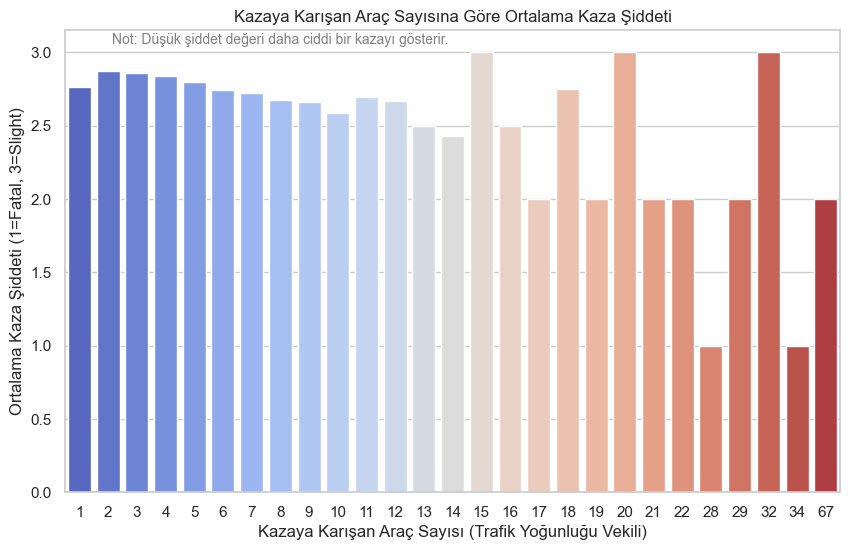

In [52]:
df = pd.DataFrame(data)


df['Accident_Severity_Numeric'] = df['Accident_Severity'].map({'Fatal': 1, 'Serious': 2, 'Slight': 3}).fillna(df['Accident_Severity']).astype(int)



# 1. Araç sayısının benzersiz değerlerini belirle
unique_vehicles = df['Number_of_Vehicles'].unique()
print(f"Veri setindeki benzersiz araç sayıları: {np.sort(unique_vehicles)}")

# 2. Araç sayısına göre gruplandırıp Kaza Şiddeti'nin ortalamasını al
# ortalama değer 1'e yaklaştıkça kaza daha şiddetli demektir.
avg_severity_by_vehicles = df.groupby('Number_of_Vehicles')['Accident_Severity_Numeric'].mean().reset_index()

print("\nAraç Sayısına Göre Ortalama Kaza Şiddeti:")
print(avg_severity_by_vehicles)

# --- Görselleştirme ---

plt.figure(figsize=(10, 6))
sns.barplot(data=avg_severity_by_vehicles, x='Number_of_Vehicles', y='Accident_Severity_Numeric', palette='coolwarm')

# Grafiğe bir başlık ve eksen etiketleri ekleyelim
plt.title('Kazaya Karışan Araç Sayısına Göre Ortalama Kaza Şiddeti')
plt.xlabel('Kazaya Karışan Araç Sayısı (Trafik Yoğunluğu Vekili)')
plt.ylabel('Ortalama Kaza Şiddeti (1=Fatal, 3=Slight)')
plt.xticks(rotation=0) 

# sayı azaldıkça şiddet artıyor. bunu belirtmek için açıklama ekleyelim.
plt.text(7, plt.ylim()[1] * 0.97, "Not: Düşük şiddet değeri daha ciddi bir kazayı gösterir.",
         horizontalalignment='center', color='gray', fontsize=10)


plt.show()


In [53]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M').dt.hour
df['Day_of_Week'] = df['Date'].dt.dayofweek
day_names = ['Pazartesi', 'Salı', 'Çarşamba', 'Perşembe', 'Cuma', 'Cumartesi', 'Pazar']
df['Day_of_Week_Name'] = df['Day_of_Week'].map(lambda x: day_names[x])

In [54]:
severity_map = {1: 'Fatal', 2: 'Serious', 3: 'Slight'}
df['Accident_Severity'] = df['Accident_Severity'].map(severity_map)
df['Accident_Severity_Numeric'] = df['Accident_Severity'].map({'Fatal': 1, 'Serious': 2, 'Slight': 3})

urban_rural_map = {1: 'Urban', 2: 'Rural'}
df['Urban_or_Rural_Area'] = df['Urban_or_Rural_Area'].map(urban_rural_map)

In [55]:
df = df.reset_index(drop=True)

C:\Users\asus\AppData\Local\Temp\ipykernel_16516\399958816.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Weather_Conditions', palette='viridis', order=df['Weather_Conditions'].value_counts().index)


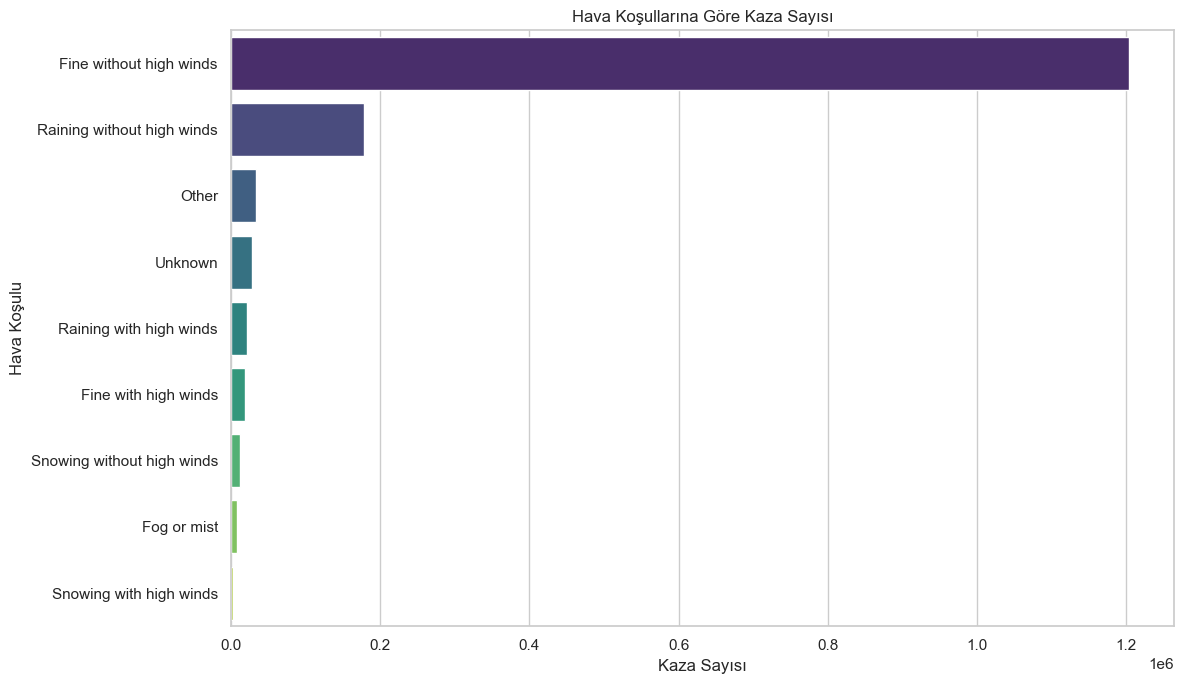

In [56]:
plt.figure(figsize=(12, 7))
sns.countplot(data=df, y='Weather_Conditions', palette='viridis', order=df['Weather_Conditions'].value_counts().index)
plt.title('Hava Koşullarına Göre Kaza Sayısı')
plt.xlabel('Kaza Sayısı')
plt.ylabel('Hava Koşulu')
plt.tight_layout()
plt.show()

C:\Users\asus\AppData\Local\Temp\ipykernel_16516\788878311.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_df, x='Percentage', y='Condition', palette='Paired') # Yatay çubuk grafik daha iyi olur


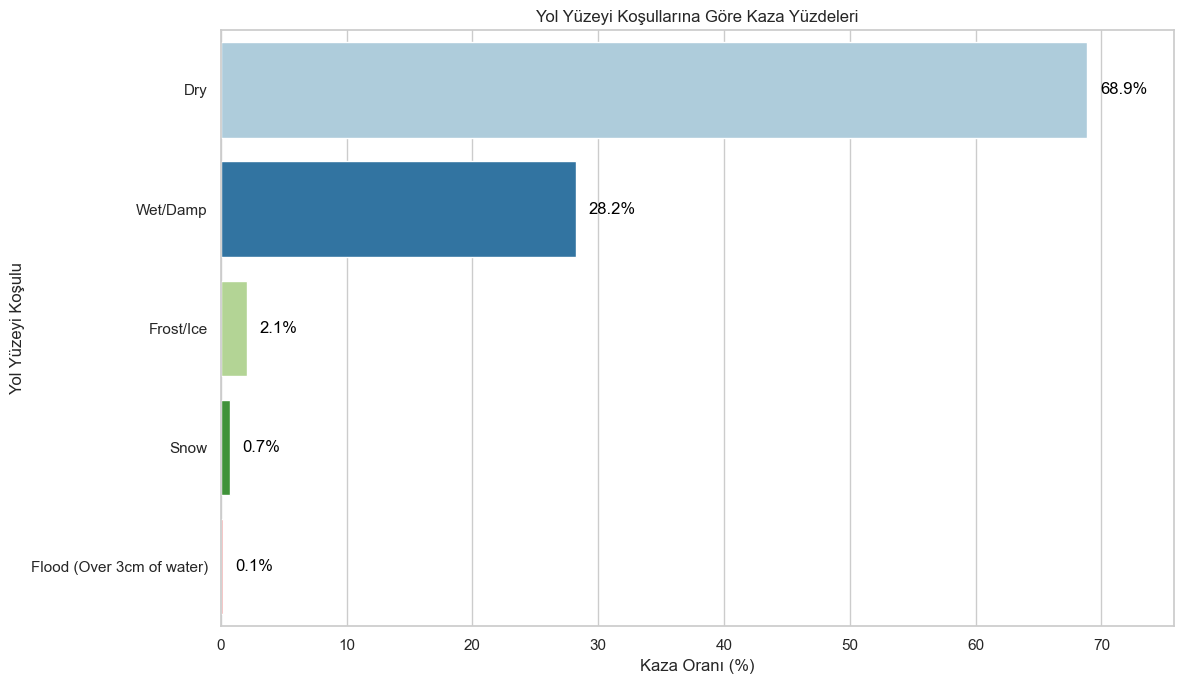

In [62]:
df = pd.DataFrame(data)

# İndeksi sıfırla (önceki hata için önemli!)
df = df.reset_index(drop=True)

# Road_Surface_Conditions sütununda NaN değerler olabilir, bunları düşürelim.
df_clean_road_surface = df.dropna(subset=['Road_Surface_Conditions'])

# Her bir yol yüzeyi koşulunun kaç kez geçtiğini say
road_surface_counts = df_clean_road_surface['Road_Surface_Conditions'].value_counts()

# Yüzdeleri hesapla
total_accidents = road_surface_counts.sum()
road_surface_percentages = (road_surface_counts / total_accidents) * 100

# Bir DataFrame'e dönüştürerek Seaborn ile daha kolay çizim yapabiliriz
plot_df = pd.DataFrame({
    'Condition': road_surface_percentages.index,
    'Percentage': road_surface_percentages.values
})

# Yüzdeye göre sıralama yap (en çoktan en aza)
plot_df = plot_df.sort_values(by='Percentage', ascending=False)


plt.figure(figsize=(12, 7))
sns.barplot(data=plot_df, x='Percentage', y='Condition', palette='Paired') # Yatay çubuk grafik daha iyi olur

plt.title('Yol Yüzeyi Koşullarına Göre Kaza Yüzdeleri')
plt.xlabel('Kaza Oranı (%)')
plt.ylabel('Yol Yüzeyi Koşulu')

# Çubuklara yüzde değerlerini ekleyelim (okunurluğu artırmak için)
for index, row in plot_df.iterrows():
    plt.text(row['Percentage'] + 1, index, f"{row['Percentage']:.1f}%", color='black', ha="left", va='center')

plt.xlim(0, plot_df['Percentage'].max() * 1.1) # X eksenini biraz genişlet yüzdelerin sığması için
plt.tight_layout()
plt.show()

C:\Users\asus\AppData\Local\Temp\ipykernel_16516\2852114415.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_df, x='Percentage', y='Condition', palette='Paired') # Yatay çubuk grafik daha iyi olur


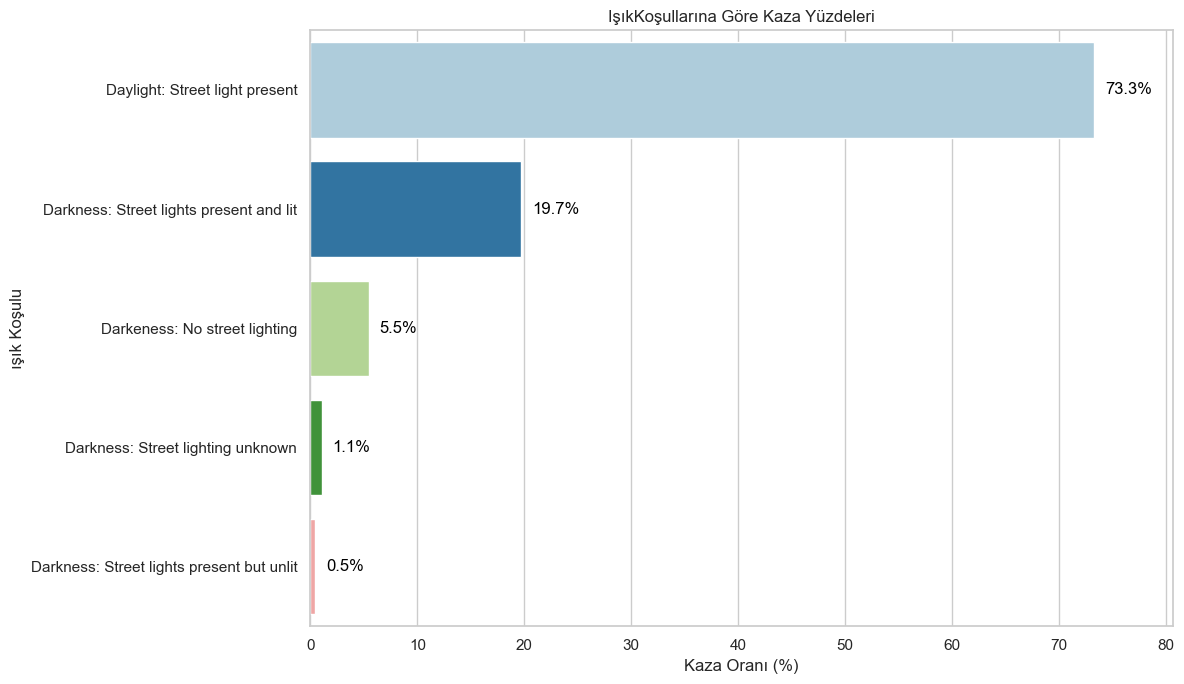

In [64]:
df_light_condition = df.dropna(subset=['Light_Conditions'])

# Her bir yol yüzeyi koşulunun kaç kez geçtiğini say
light_condition= df_light_condition['Light_Conditions'].value_counts()

# Yüzdeleri hesapla
total_accidents = light_condition.sum()
light_condition = (light_condition / total_accidents) * 100

# Bir DataFrame'e dönüştürerek Seaborn ile daha kolay çizim yapabiliriz
plot_df = pd.DataFrame({
    'Condition': light_condition.index,
    'Percentage': light_condition.values
})

# Yüzdeye göre sıralama yap (en çoktan en aza)
plot_df = plot_df.sort_values(by='Percentage', ascending=False)


plt.figure(figsize=(12, 7))
sns.barplot(data=plot_df, x='Percentage', y='Condition', palette='Paired') # Yatay çubuk grafik daha iyi olur

plt.title('IşıkKoşullarına Göre Kaza Yüzdeleri')
plt.xlabel('Kaza Oranı (%)')
plt.ylabel('ışık Koşulu')

# Çubuklara yüzde değerlerini ekleyelim (okunurluğu artırmak için)
for index, row in plot_df.iterrows():
    plt.text(row['Percentage'] + 1, index, f"{row['Percentage']:.1f}%", color='black', ha="left", va='center')

plt.xlim(0, plot_df['Percentage'].max() * 1.1) # X eksenini biraz genişlet yüzdelerin sığması için
plt.tight_layout()
plt.show()

C:\Users\asus\AppData\Local\Temp\ipykernel_16516\3192934824.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_df, x='Percentage', y='Condition', palette='Paired') # Yatay çubuk grafik daha iyi olur


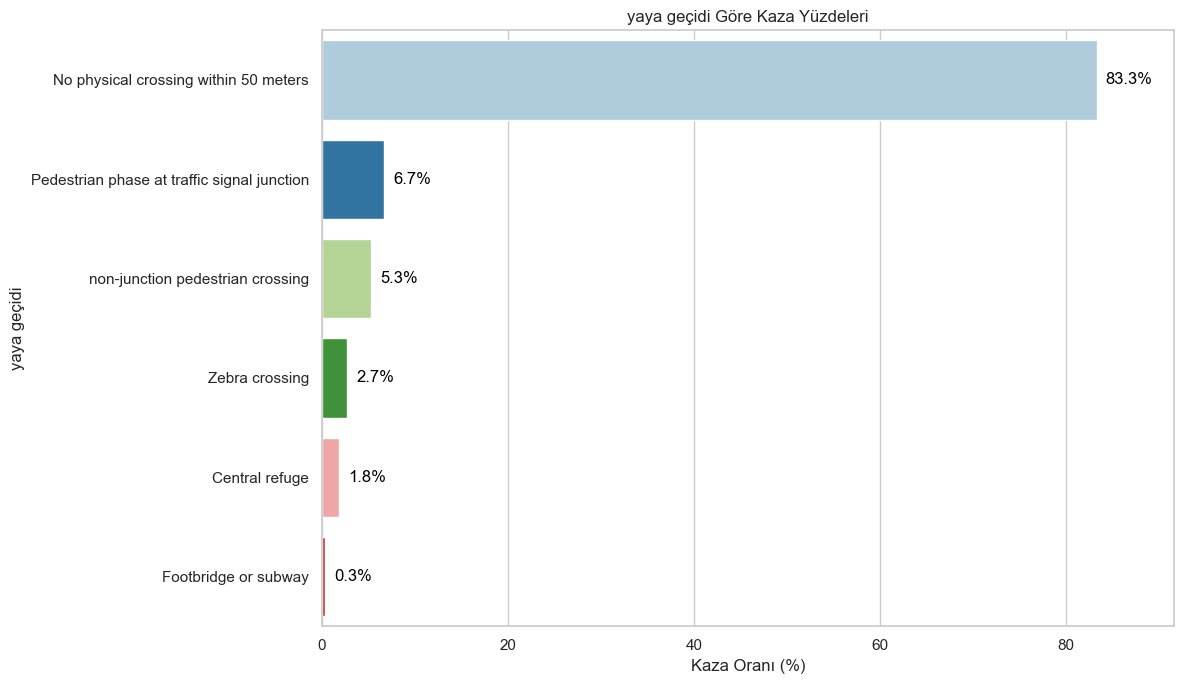

In [72]:
df_Pedestrian_Cond_array = df.dropna(subset=['Pedestrian_Crossing-Physical_Facilities'])

# Her bir yol yüzeyi koşulunun kaç kez geçtiğini say
Pedestrian_Cond_array= df_Pedestrian_Cond_array['Pedestrian_Crossing-Physical_Facilities'].value_counts()

# Yüzdeleri hesapla
total_accidents = Pedestrian_Cond_array.sum()
Pedestrian_Cond_array= (Pedestrian_Cond_array / total_accidents) * 100

# Bir DataFrame'e dönüştürerek Seaborn ile daha kolay çizim yapabiliriz
plot_df = pd.DataFrame({
    'Condition': Pedestrian_Cond_array.index,
    'Percentage': Pedestrian_Cond_array.values
})

# Yüzdeye göre sıralama yap (en çoktan en aza)
plot_df = plot_df.sort_values(by='Percentage', ascending=False)


plt.figure(figsize=(12, 7))
sns.barplot(data=plot_df, x='Percentage', y='Condition', palette='Paired') # Yatay çubuk grafik daha iyi olur

plt.title('yaya geçidi Göre Kaza Yüzdeleri')
plt.xlabel('Kaza Oranı (%)')
plt.ylabel('yaya geçidi')

# Çubuklara yüzde değerlerini ekleyelim (okunurluğu artırmak için)
for index, row in plot_df.iterrows():
    plt.text(row['Percentage'] + 1, index, f"{row['Percentage']:.1f}%", color='black', ha="left", va='center')

plt.xlim(0, plot_df['Percentage'].max() * 1.1) # X eksenini biraz genişlet yüzdelerin sığması için
plt.tight_layout()
plt.show()

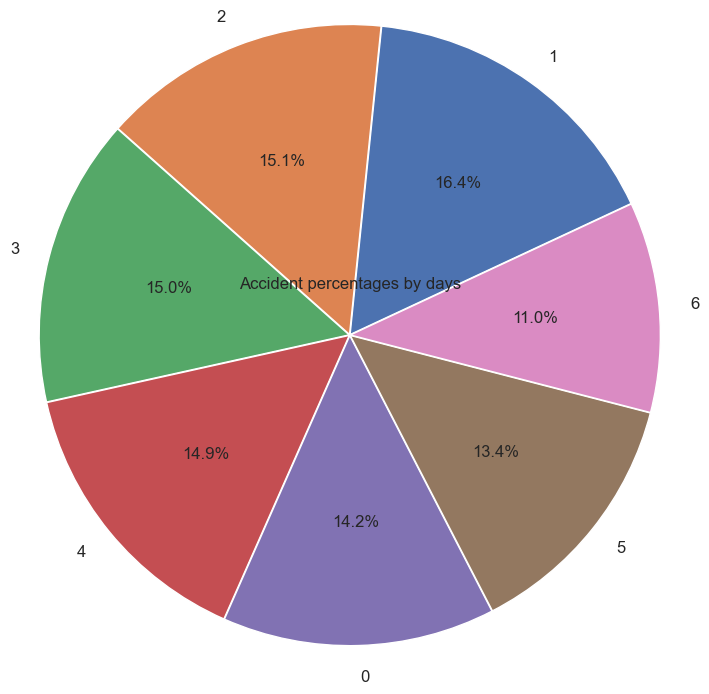

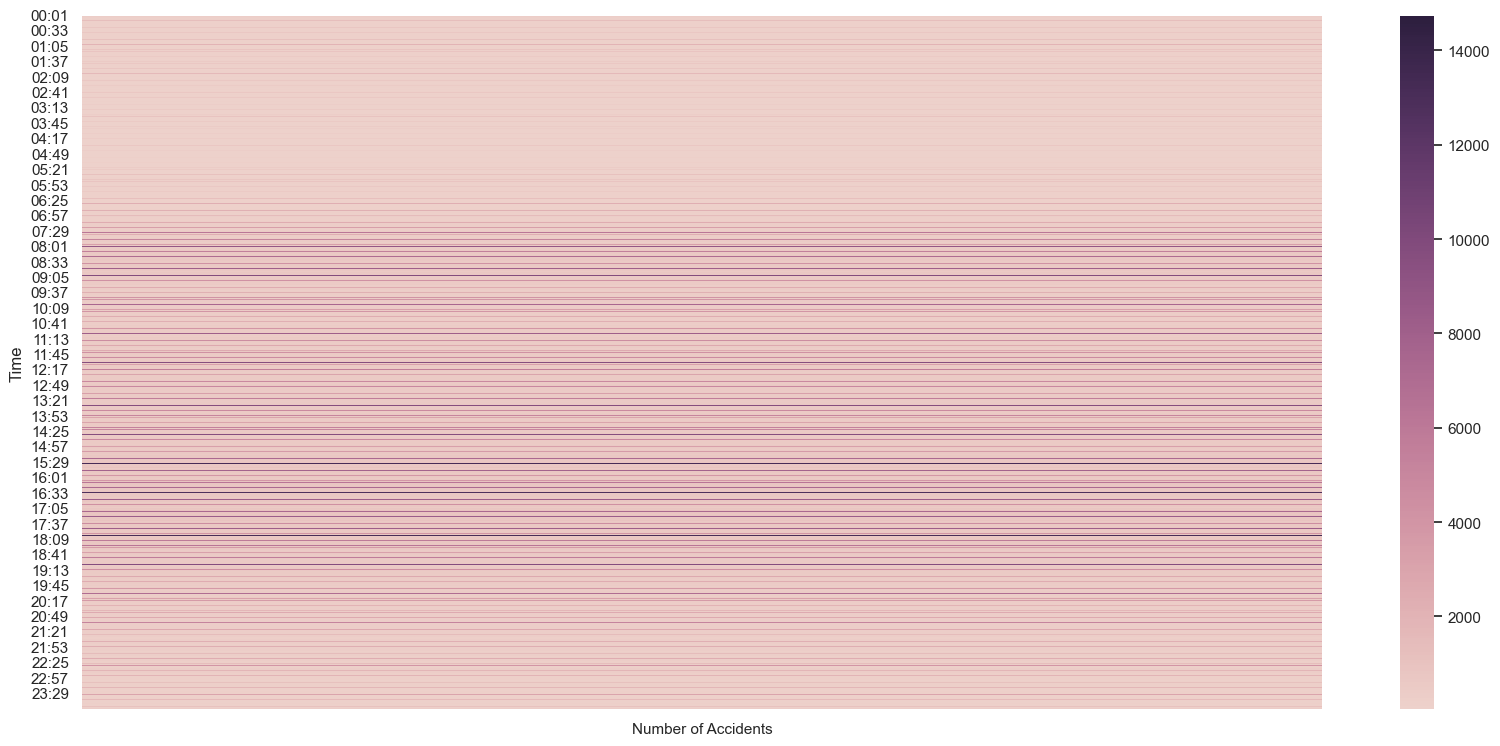

In [73]:
day_array=data["Day_of_Week"].unique()
day=data["Day_of_Week"].value_counts().values
plt.pie(day,labels=day_array,radius=10,startangle=25,textprops={"size":"medium"},autopct='%1.1f%%',explode=(0.02,0.02,0.02,0.02,0.02,0.02,0.02))
plt.title("Accident percentages by days")
plt.show()


time = data["Time"].value_counts() 

time_df = pd.DataFrame(time, index=data["Time"])
time_df.columns =['Number of Accidents']
time_heat = time_df.groupby('Time').min()

plt.figure(figsize = (20,9))
ax = sns.heatmap(time_heat,cmap=sns.cubehelix_palette(as_cmap=True)) 
plt.yticks(rotation =0)
plt.show()

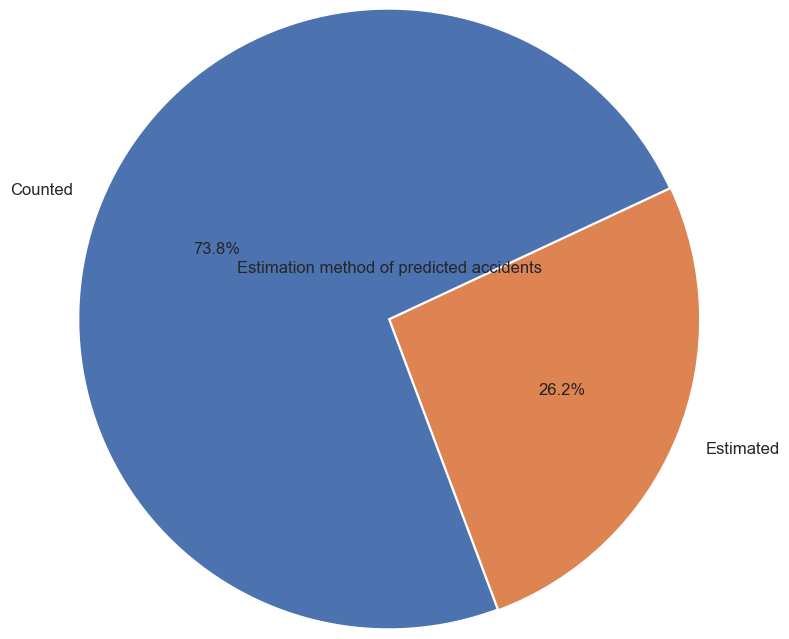

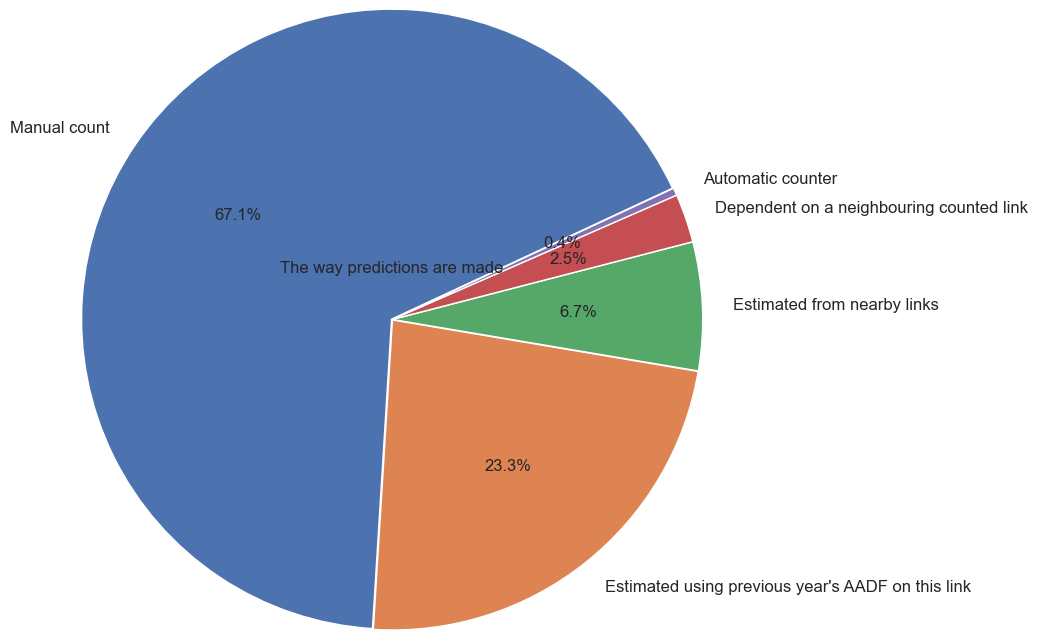

In [75]:
df4=pd.read_csv('ukTrafficAADF.csv')

df_4=df4.drop(['AADFYear', 'CP','Region', 'LocalAuthority', 'Road', 'RoadCategory', 'Easting',
       'Northing', 'StartJunction', 'EndJunction', 'LinkLength_km',
       'LinkLength_miles', 'PedalCycles', 'Motorcycles', 'CarsTaxis',
       'BusesCoaches', 'LightGoodsVehicles', 'V2AxleRigidHGV',
       'V3AxleRigidHGV', 'V4or5AxleRigidHGV', 'V3or4AxleArticHGV',
       'V5AxleArticHGV', 'V6orMoreAxleArticHGV', 'AllHGVs', 'AllMotorVehicles',
       'Lat', 'Lon'],axis=1)

df_4.isna().sum()
df_4.dropna(inplace=True)

estimation_array=df_4["Estimation_method"].unique()
estimation=df_4["Estimation_method"].value_counts().values
plt.pie(estimation,labels=estimation_array,radius=10,startangle=25,textprops={"size":"medium"},autopct='%1.1f%%',explode=(0.02,0.02))
plt.title("Estimation method of predicted accidents")
plt.show()


estimation_method_array=df_4["Estimation_method_detailed"].unique()
estimation_method=df_4["Estimation_method_detailed"].value_counts().values
plt.pie(estimation_method,labels=estimation_method_array,radius=10,startangle=25,textprops={"size":"medium"},autopct='%1.1f%%',explode=(0.02,0.02,0.02,0.02,0.02))
plt.title("The way predictions are made")
plt.show()


In [76]:
#Two different columns were used to make this evaluation: Estimation_Method and Estimation method_detailed.As can be seen from these graphs, it is possible to predict accidents by supplementing with other information, but it is necessary to automate it.

C:\Users\asus\AppData\Local\Temp\ipykernel_16516\4245923586.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Urban_or_Rural_Area",data=df,palette='Paired')  #survived column'unu görselleştirdik


<Axes: xlabel='Urban_or_Rural_Area', ylabel='count'>

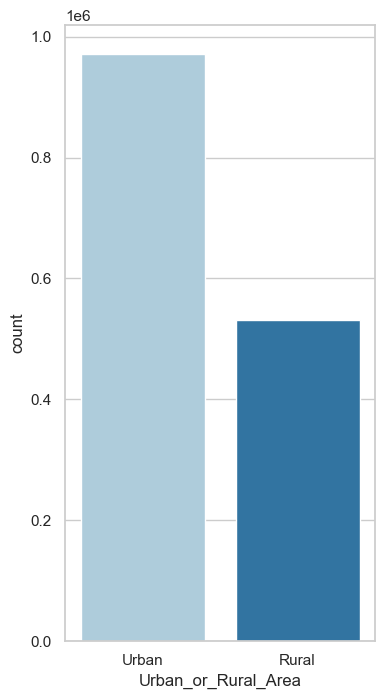

In [82]:
plt.figure(figsize=(4, 8))
sns.countplot(x="Urban_or_Rural_Area",data=df,palette='Paired')  #survived column'unu görselleştirdik

In [83]:
df.head

<bound method NDFrame.head of          Police_Force Accident_Severity  Number_of_Vehicles  \
0                   1           Serious                   1   
1                   1            Slight                   1   
2                   1            Slight                   2   
3                   1            Slight                   1   
4                   1            Slight                   1   
...               ...               ...                 ...   
1501783            98           Serious                   2   
1501784            98            Slight                   2   
1501785            98            Slight                   1   
1501786            98           Serious                   3   
1501787            98            Slight                   2   

         Number_of_Casualties  Day_of_Week   Time  1st_Road_Class  \
0                           1            1  17:42               3   
1                           1            2  17:36               4   
2     